In [1]:
acc_dict = {5:0, 6:0, 8:0, 10:0, 12:0, 15:0}
f_dict = {5:0, 6:0, 8:0, 10:0, 12:0, 15:0}

In [159]:
import pandas as pd
import numpy as np
import json
path = './dataset/FOOTBALL/football_5.json'
window_length = 5

In [160]:
import fasttext
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))



In [161]:
with open(path) as f:
    data_json = json.load(f)

In [162]:
len(data_json)

257759

In [163]:
j = 0
for i in data_json.keys():
    if j>5:
        break
    j+=1
    print(data_json[i])

{'label': {'player': 'george blanda', 'position': 'QB', 'race': 'white', 'reference': 'george blanda', 'teams': ['houston_oilers', 'dallas_texans'], 'year': '1962'}, 'mention': ['ball', 'as', 'the', 'honorary', 'referee', 'shaky', '<player>', 'lander', 'will']}
{'label': {'player': 'dave grayson', 'position': 'DB', 'race': 'nonwhite', 'reference': 'grayson', 'teams': ['houston_oilers', 'dallas_texans'], 'year': '1962'}, 'mention': ['when', 'who', 'the', 'football', 'hey', 'and', 'james', 'is', '28']}
{'label': {'player': 'dave grayson', 'position': 'DB', 'race': 'nonwhite', 'reference': 'grayson', 'teams': ['houston_oilers', 'dallas_texans'], 'year': '1962'}, 'mention': ['<player>', 'and', 'james', 'is', '28', 'is', '45', 'hitting', 'a']}
{'label': {'player': 'len dawson', 'position': 'QB', 'race': 'white', 'reference': 'dawson', 'teams': ['houston_oilers', 'dallas_texans'], 'year': '1962'}, 'mention': ['for', 'dallas', 'will', 'be', 'when', 'number', '16', '<player>', 'is']}
{'label':

In [202]:
df_lists = []
for i in data_json.keys():
    temp = []
    label = data_json[i]['label']
    temp.append(label['player'])
    temp.append(label['position'])
    temp.append(label['race'])
    temp.append(label['reference'])
    temp.append(label['teams'][0])
    temp.append(label['teams'][1])
    temp.append(label['year'])
    temp.append(data_json[i]['mention'])
    temp.append(' '.join(data_json[i]['mention']))
    df_lists.append(temp)

data_df = pd.DataFrame(df_lists, columns= ['Name', 'Position', 'Race', 'Reference', 'Team1', 
                                           'Team2', 'Year', 'Mention_tokens', 'Mention_text' ])

In [203]:
data_df.Race.unique()

array(['white', 'nonwhite'], dtype=object)

In [204]:
len(data_df)

257759

In [205]:
# data_df = data_df.loc[data_df['Position']=='QB']

In [206]:
data_df.head()

,Name,Position,Race,Reference,Team1,Team2,Year,Mention_tokens,Mention_text
0,george blanda,QB,white,george blanda,houston_oilers,dallas_texans,1962,"[ball, as, the, honorary, referee, shaky, <pla...",ball as the honorary referee shaky <player> la...
1,dave grayson,DB,nonwhite,grayson,houston_oilers,dallas_texans,1962,"[when, who, the, football, hey, and, james, is...",when who the football hey and james is 28
2,dave grayson,DB,nonwhite,grayson,houston_oilers,dallas_texans,1962,"[<player>, and, james, is, 28, is, 45, hitting...",<player> and james is 28 is 45 hitting a
3,len dawson,QB,white,dawson,houston_oilers,dallas_texans,1962,"[for, dallas, will, be, when, number, 16, <pla...",for dallas will be when number 16 <player> is
4,abner haynes,RB,nonwhite,abner haynes,houston_oilers,dallas_texans,1962,"[be, when, <player>, number, 16, is, 28, he, s]",be when <player> number 16 is 28 he s


In [207]:
len(data_df)

257759

#### Check for missing Race information on players

In [208]:
data_df.head()

,Name,Position,Race,Reference,Team1,Team2,Year,Mention_tokens,Mention_text
0,george blanda,QB,white,george blanda,houston_oilers,dallas_texans,1962,"[ball, as, the, honorary, referee, shaky, <pla...",ball as the honorary referee shaky <player> la...
1,dave grayson,DB,nonwhite,grayson,houston_oilers,dallas_texans,1962,"[when, who, the, football, hey, and, james, is...",when who the football hey and james is 28
2,dave grayson,DB,nonwhite,grayson,houston_oilers,dallas_texans,1962,"[<player>, and, james, is, 28, is, 45, hitting...",<player> and james is 28 is 45 hitting a
3,len dawson,QB,white,dawson,houston_oilers,dallas_texans,1962,"[for, dallas, will, be, when, number, 16, <pla...",for dallas will be when number 16 <player> is
4,abner haynes,RB,nonwhite,abner haynes,houston_oilers,dallas_texans,1962,"[be, when, <player>, number, 16, is, 28, he, s]",be when <player> number 16 is 28 he s


In [209]:
data_df.Race.isnull().values.any()

False

In [210]:
data_df.Race.isnull().sum()

0

No missing data

#### Wordclouds

In [211]:
import matplotlib.pyplot as plt

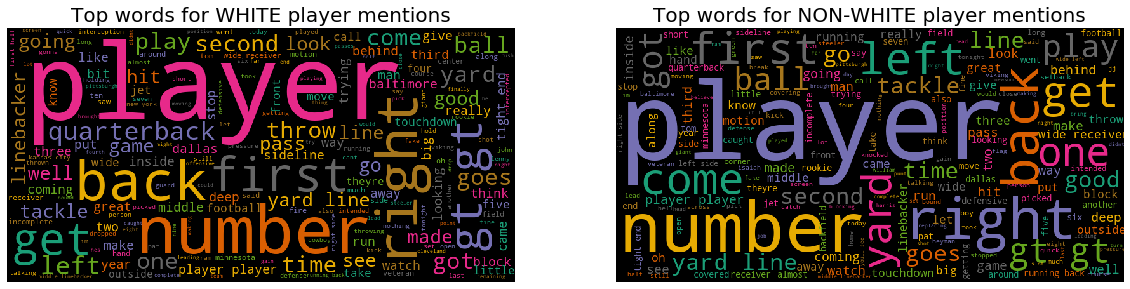

In [212]:
n_posts = 10000
whites = ' '.join(data_df[data_df['Race'] == 'white']['Mention_text'].str.lower().values[:n_posts])
nonwhites = ' '.join(data_df[data_df['Race'] == 'nonwhite']['Mention_text'].str.lower().values[:n_posts])

wordcloud_W = WordCloud(max_font_size=None, stopwords=stop,scale = 2,colormap = 'Dark2').generate(whites)
wordcloud_NW = WordCloud(max_font_size=None, stopwords=stop,scale = 2,colormap = 'Dark2').generate(nonwhites)

fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].imshow(wordcloud_W)
ax[0].set_title('Top words for WHITE player mentions',fontsize = 20)
ax[0].axis("off")

ax[1].imshow(wordcloud_NW)
ax[1].set_title('Top words for NON-WHITE player mentions',fontsize = 20)
ax[1].axis("off")

plt.show()

Wordclouds seem very similar - not much can be said visually

### Building a basic Naive Bayes model

In [213]:
data_df['label'] = data_df.Race.map({'white': 0, 'nonwhite': 1})

# preprocessing 

# lower casing all letters 
data_df['Mention_text'] = data_df.Mention_text.map(lambda x: x.lower())

# removing punctuation
data_df['Mention_text'] = data_df.Mention_text.str.replace('[^\w\s]', '')

In [214]:
# first without stemming
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
counts = count_vect.fit_transform(data_df['Mention_text'])

In [215]:
# TFIDF
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts_tfidf = transformer.transform(counts)

In [216]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts_tfidf, data_df['label'], test_size=0.2, random_state=42)

In [232]:
# training the Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

model = MultinomialNB().fit(X_train, y_train)
# scikit_log_reg = LogisticRegression(solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=100)
# model=scikit_log_reg.fit(X_train,y_train)

In [233]:
import numpy as np

predicted = model.predict(X_test)

acc_dict[window_length] = np.mean(predicted == y_test)
print(np.mean(predicted == y_test))

0.6718653010552452


[[ 1313 16076]
 [  840 33323]]


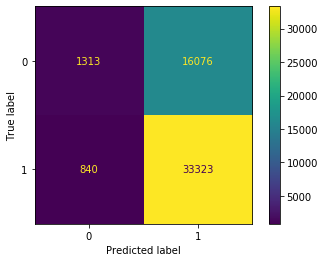

In [234]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, predicted))

plot_confusion_matrix(model, X_test, y_test, values_format='d')  # doctest: +SKIP
plt.show() 

In [220]:
from sklearn.metrics import f1_score, precision_score, recall_score
f_dict[window_length] = f1_score(y_test, predicted, average='macro')
print(f1_score(y_test, predicted, average='macro'))

0.5751876625453457


In [221]:
X_test.shape[0]

51552

In [184]:
f_dict

{5: 0.5751876625453457,
 6: 0.5804026939692069,
 8: 0.579051937511107,
 10: 0.5825208672239934,
 12: 0.5834801245417867,
 15: 0.5812045533760148}

In [228]:
len(model.coef_[0])

38036